# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Ernesto

Apellidos: Hidalgo Felipe

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [65]:
#### Omitir - Código para el venv ####

# Ejecuta VSCode como administrador
# Crea un venv con el propio VSCode, con el Python que elijas (ya creado)
# Selecciona el venv como kernel del código
# Comprueba que las librerías se instalan en .venv\lib\site-packages (empieza por pd por si acaso)
# Es buena práctica usar venvs para los proyectos

import sys

sys.prefix != sys.base_prefix # Tiene que ser true

True

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para las visualizaciones
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                            mean_absolute_percentage_error)
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

# Análisis descriptivos


#### 0. Estudio y preprocesado de los datos

In [15]:
df = pd.read_csv("housing_time_series_by_madrid_neighbourhood.csv")

# Exploración inicial de los datos
print("\nResumen inicial de los datos:\n")
print(df.info())
print("\nEstadísticas descriptivas:\n")
print(df.describe())


Resumen inicial de los datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  2218 non-null   object 
 1   date                 2218 non-null   object 
 2   m2_price             2218 non-null   float64
 3   inflation            2218 non-null   float64
 4   HICP                 2218 non-null   float64
 5   population_density   2218 non-null   int64  
 6   listings_count       2218 non-null   int64  
 7   minimum_nights       2218 non-null   float64
 8   nigth_price          2218 non-null   float64
 9   availability_365     2218 non-null   float64
 10  listing_reviews      2218 non-null   int64  
 11  number_of_reviews    2218 non-null   float64
 12  reviews_per_month    2218 non-null   float64
 13  hosts_count          2218 non-null   int64  
 14  Private_room         2218 non-null   int64  
 15  Entire

In [16]:
# Convertimos 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'])

In [17]:
# Revisamos valores nulos
df.isnull().sum()

neighbourhood_group    0
date                   0
m2_price               0
inflation              0
HICP                   0
population_density     0
listings_count         0
minimum_nights         0
nigth_price            0
availability_365       0
listing_reviews        0
number_of_reviews      0
reviews_per_month      0
hosts_count            0
Private_room           0
Entire_home            0
Hotel_room             0
Shared_room            0
dtype: int64

In [18]:
# Eliminamos valores nulos si es necesario (no lo era)
df = df.dropna()

#### 1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes (3 puntos)

##### Visualización 1 - Evolución del precio promedio (€) / m2 por barrio

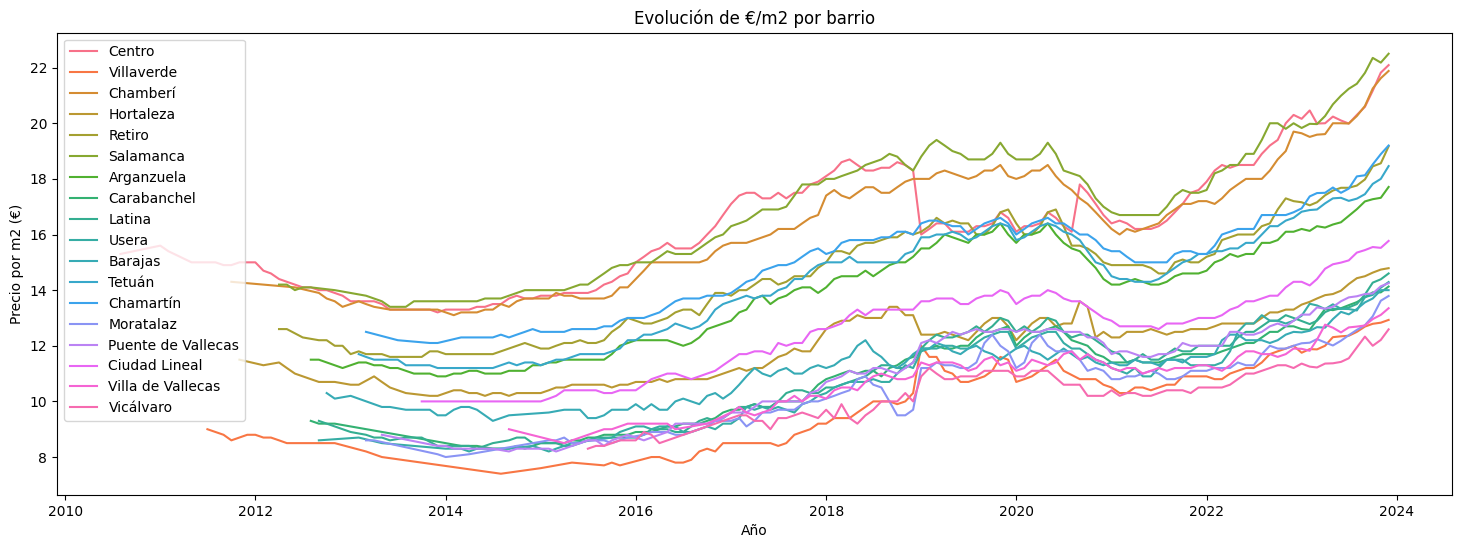

In [20]:
df_grouped_barrio = df.groupby(['date', 'neighbourhood_group']).mean().reset_index()

plt.figure(figsize=(18, 6))
sns.lineplot(data=df_grouped_barrio, x="date", y="m2_price", hue="neighbourhood_group")

plt.title("Evolución de €/m2 por barrio")
plt.xlabel("Año")
plt.ylabel("Precio por m2 (€)")
plt.legend()
plt.show()

Vemos cómo el precio de todos los barrios de Madrid ha seguido la misma tendencia alcista, cada uno dentro de su horquilla económica. También vemos cómo la pandemia provocó una caída temporal, pero una vez superada la evolución recuperó su curso anterior.

##### Visualización 2.1 - HICP vs precio (€) / m2 (líneas)

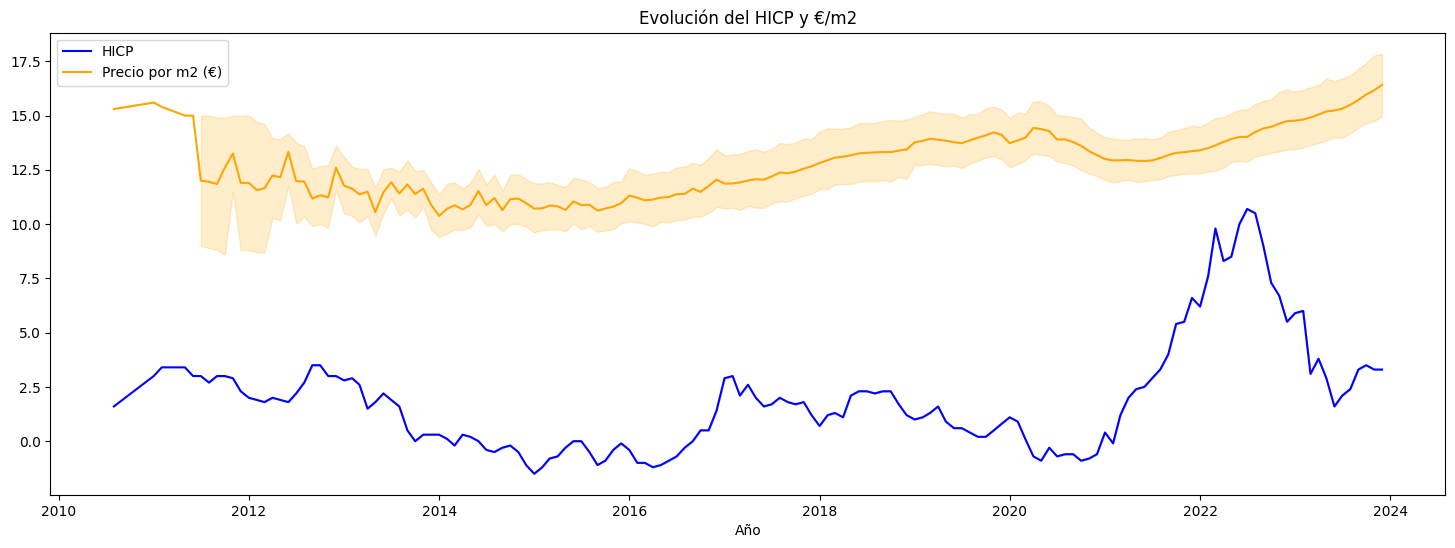

In [21]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x="date", y="HICP", color="blue", label="HICP")
sns.lineplot(data=df, x="date", y="m2_price", color="orange", label="Precio por m2 (€)")

plt.title("Evolución del HICP y €/m2")
plt.xlabel("Año")
plt.ylabel("")
plt.legend()
plt.show()

Aquí podríamos definir una correlación notable entre el precio por m2 de las viviendas y el HICP. Al aumentar la inflación en la zona euro, es normal que los precios también aumenten, tanto del suelo como de cualquier otro producto y servicio. Puede que el HICP se anticipe un poco al €/m2, lo que podría hacerlo un indicador interesante.

##### Visualización 2.2 - HICP vs precio (€) / m2 (histograma)

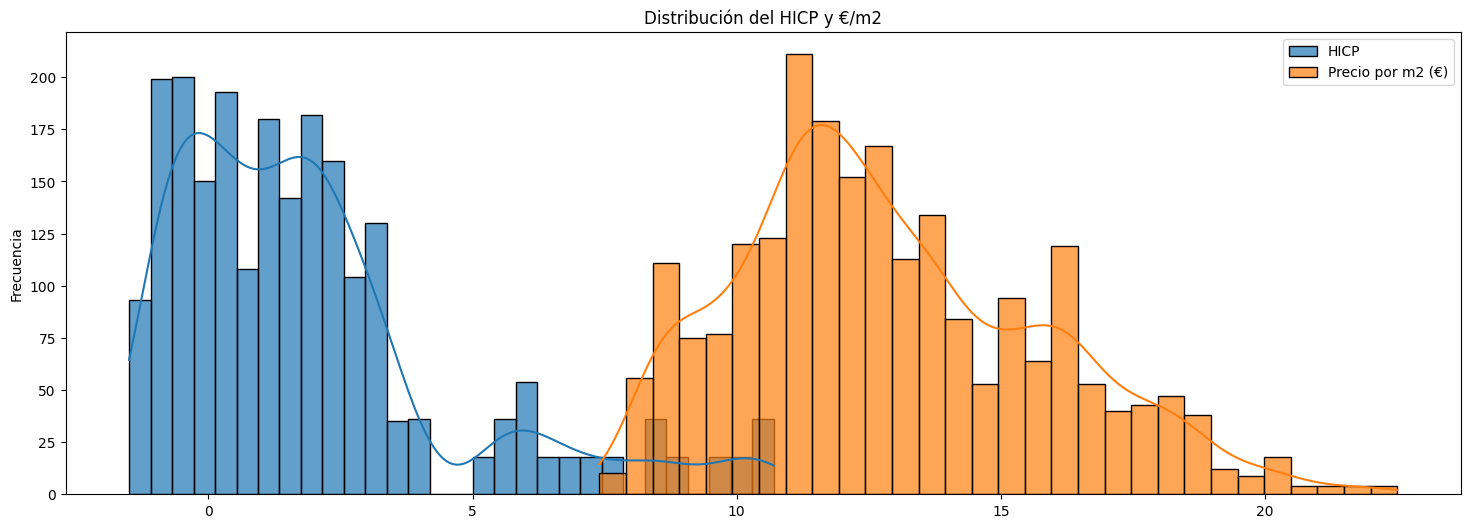

In [47]:
plt.figure(figsize=(18, 6))
sns.histplot(df['HICP'], bins=30, alpha=0.7, label="HICP", kde=True) # Bins para barras, alpha para transparencia
sns.histplot(df['m2_price'], bins=30, alpha=0.7, label="Precio por m2 (€)", kde=True) # kde para línea de tendencia

plt.title("Distribución del HICP y €/m2")
plt.xlabel("")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Para hacer más obvia la similitud, lo expresamos en forma de histograma. Vemos que cada uno, en sus valores, sigue una forma muy parecida, con la moda algo anticipada y una cola a la derecha.

##### Visualización 3 - Distribución del precio por m2 (€) por densidad de población

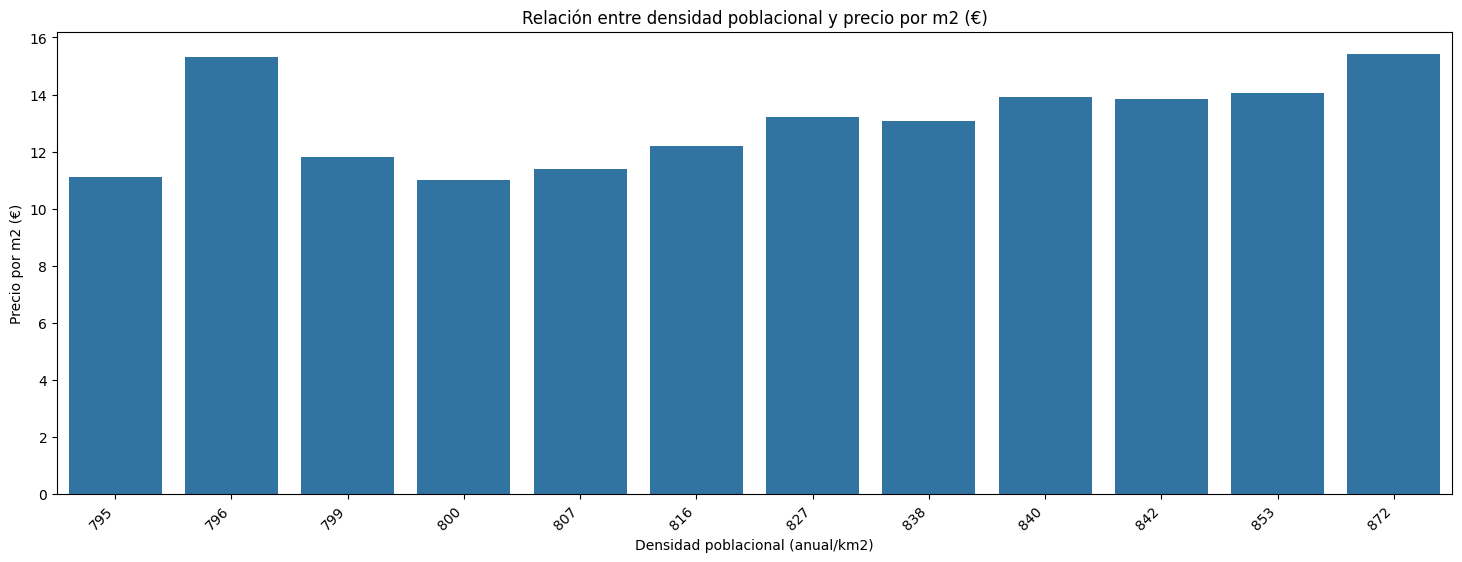

In [42]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="population_density", y="m2_price", estimator="mean", errorbar=None)

plt.title("Relación entre densidad poblacional y precio por m2 (€)")
plt.xlabel("Densidad poblacional (anual/km2)")
plt.ylabel("Precio por m2 (€)")
plt.xticks(rotation=45, ha="right") # ha="right" para que empiece en el tick y no centrado
plt.show()

En este caso apreciamos que sí hay una correlación entre la densidad poblacional y el precio por m2. Esto tiene sentido: a mayor precio de suelo, más interesa construir viviendas, por lo que se reúne más población en los núcleos más caros. Existe, no obstante, un outlier en el segundo tramo de densidad. Dicho outlier corresponde, muy probablemente, a los barrios más ricos de todos, en los que hay casas y chalets, motivo por el que la densidad es mucho menor pero los precios son los más altos.

##### Visualización 4.1 - Relación entre el número de anfitriones activos y los barrios

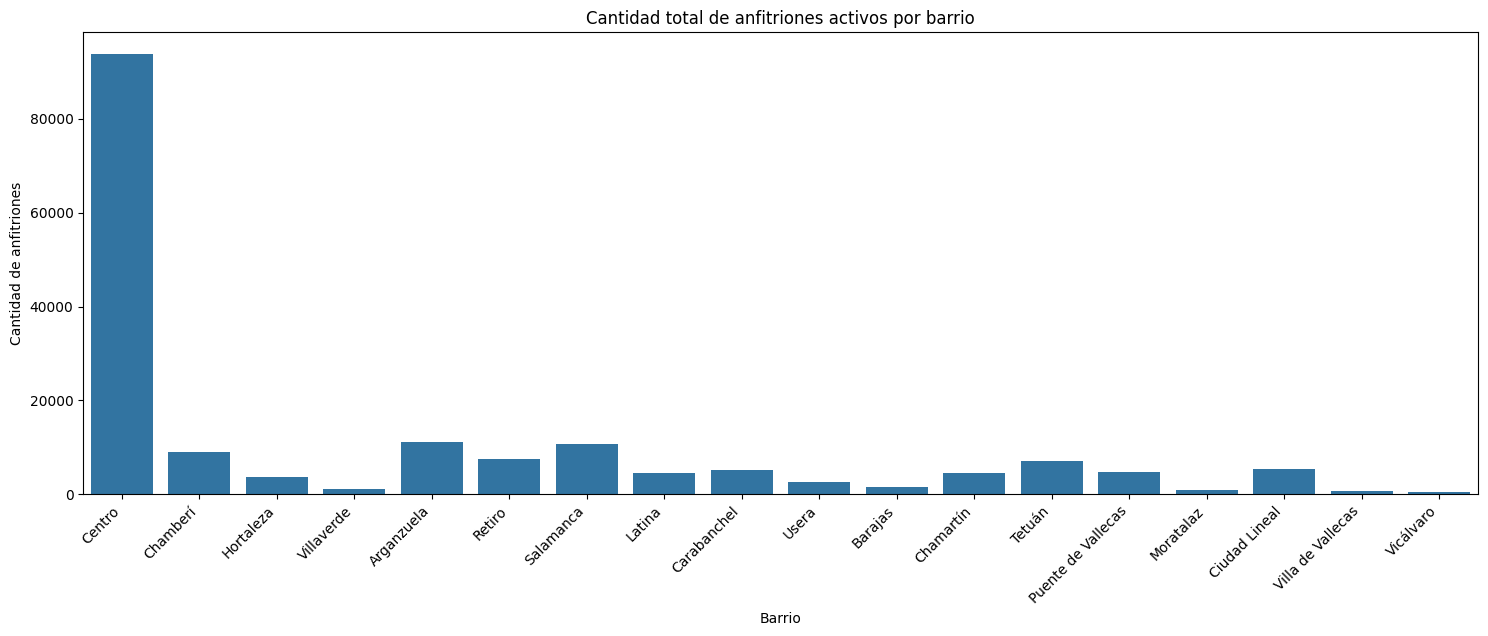

In [52]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="neighbourhood_group", y="hosts_count", estimator="sum", errorbar=None) # Usamos el TOTAL

plt.title("Cantidad total de anfitriones activos por barrio")
plt.xlabel("Barrio")
plt.ylabel("Cantidad de anfitriones")
plt.xticks(rotation=45, ha="right") # ha="right" para que empiece en el tick y no centrado
plt.show()

Era de esperar que en el centro sea donde más anfitriones hay; al fin y al cabo, la gente que viene a Airbnbs busca estar cerca de las cosas que visitar. Como esta realidad nos impide analizar bien el resto de barrios, vamos a repetir la visualización omitiendo el centro.

##### Visualización 4.2 - Relación entre el número de anfitriones activos y los barrios (omitiendo el centro)

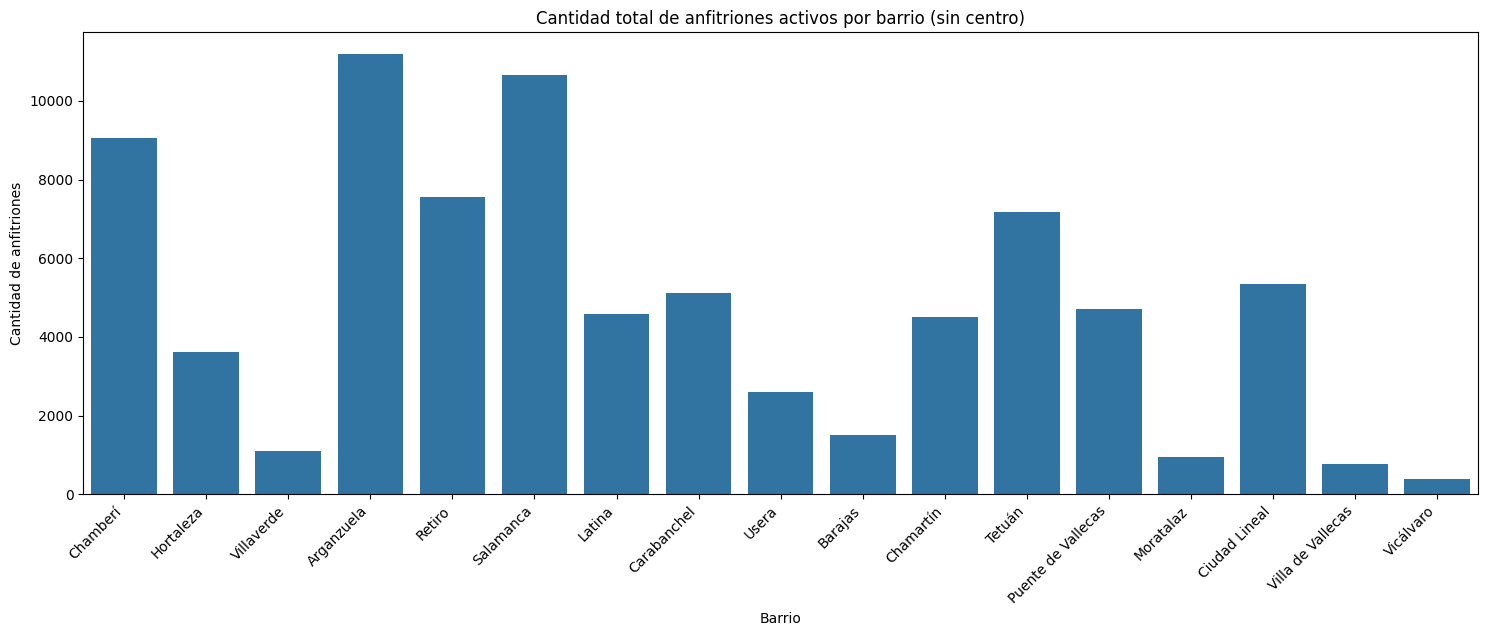

In [ ]:
df_sin_centro = df[df['neighbourhood_group'] != "Centro"].reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(data=df_sin_centro, x="neighbourhood_group", y="hosts_count", estimator="sum", errorbar=None) # Usamos el TOTAL

plt.title("Cantidad total de anfitriones activos por barrio (sin centro)")
plt.xlabel("Barrio")
plt.ylabel("Cantidad de anfitriones")
plt.xticks(rotation=45, ha="right") # ha="right" para que empiece en el tick y no centrado
plt.show()

Esta visualización es muy útil para conocer cómo de gentrificados están los barrios, y cuánto interés tienen para los turistas. Según la gráfica, el barrio de Arganzuela (omitiendo el centro) es el que más anfitriones activos tiene, seguido de Salamanca, Chamberí y Retiro (se podían intuir). Barajas, por ejemplo, al estar más a desmano, es menos atractivo para alguien que se quiere quedar en la ciudad temporalmente.

Es responsable aclarar que podría ser un poco misleading, ya que no estamos teniendo en cuenta cómo de grandes son los barrios, su densidad de población, etc., pero aun así creemos que la visualización es bastante fidedigna.

##### Visualización 5 - Distribución del precio (€) por m2 por barrio

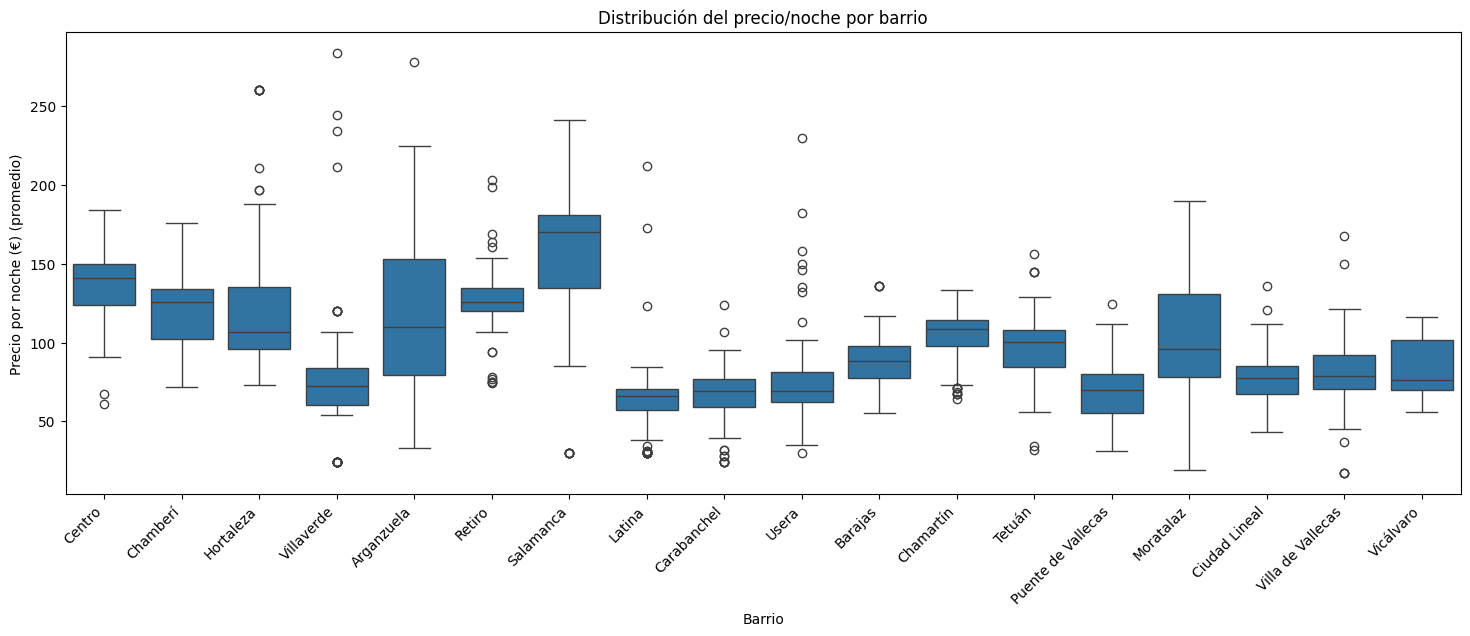

In [55]:
df_sin_outliers = df[df['nigth_price'] <= 300].reset_index() # Umbral porque los outliers quedaban muy mal

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_sin_outliers, x="neighbourhood_group", y="nigth_price")

plt.title("Distribución del precio/noche por barrio")
plt.xlabel("Barrio")
plt.ylabel("Precio por noche (€) (promedio)")
plt.xticks(rotation=45, ha="right") # ha="right" para que empiece en el tick y no centrado
plt.show()

En primer lugar, la visualización nos permite ver qué barrios son los más caros a nivel de precio por noche. Estos parecen ser Salamanca, Arganzuela, Centro, Chamberí, Retiro y Hortaleza. Si volvemos a la primera visualización de todas, veremos que coinciden con los que actualmente tienen el suelo más caro de la Comunidad, lo que nos indica que hay una fuerte correlación entre el €/m2 de las viviendas y el precio de estos alquileres temporales.

La dispersión en los precios no es excesiva, el rango típico de las cajas es de unos 100€, como mucho, para casi todas, salvando Arganzuela (recordamos que presentaba outliers) y alguno más. Esto nos hace pensar que al existir un conocimiento total de los precios por parte de anfitriones y hospedados, la disparidad entre precios no puede ser muy alta, ya que el que alquila tiene información suficiente para saber si un precio es habitual o no para un barrio.

Por último, si relacionamos esta gráfica con la anterior, intuimos que hay más anfitriones en los barrios en los que el precio por noche es más alto, al ser estos una fuente de beneficio potencialmente mayor para los anfitriones.

##### Visualización 6 - Patrones estacionales de las reviews mensuales

In [60]:
# Extraemos el año y el mes de la columna 'date'
df_patrones = df
df_patrones['year'] = df['date'].dt.year
df_patrones['month'] = df['date'].dt.month

# Calculamos la suma acumulada (CUMSUM) de reseñas mensuales por mes y año
df_patrones['cumulative_reviews'] = df_patrones.groupby(['year', 'month'])['reviews_per_month'].cumsum()
df_patrones.head(5)

,neighbourhood_group,date,m2_price,inflation,HICP,population_density,listings_count,minimum_nights,nigth_price,availability_365,...,number_of_reviews,reviews_per_month,hosts_count,Private_room,Entire_home,Hotel_room,Shared_room,year,month,cumulative_reviews
0,Centro,2010-08-01,15.3,0.3,1.6,796,1,2.0,114.000000,305.00,...,155.0,0.9000,1,0,1,0,0,2010,8,0.9000
1,Centro,2011-01-01,15.6,-0.7,3.0,800,1,2.0,114.000000,305.00,...,155.0,0.9000,1,0,1,0,0,2011,1,0.9000
2,Centro,2011-02-01,15.4,0.1,3.4,800,4,7.0,184.000000,44.25,...,100.0,0.5925,3,0,4,0,0,2011,2,0.5925
3,Centro,2011-05-01,15.0,0.0,3.4,800,5,9.6,61.000000,134.60,...,264.4,1.6120,4,1,4,0,0,2011,5,1.6120
4,Centro,2011-06-01,15.0,-0.1,3.0,800,5,5.4,135.333333,129.20,...,289.8,1.7680,4,1,4,0,0,2011,6,1.7680


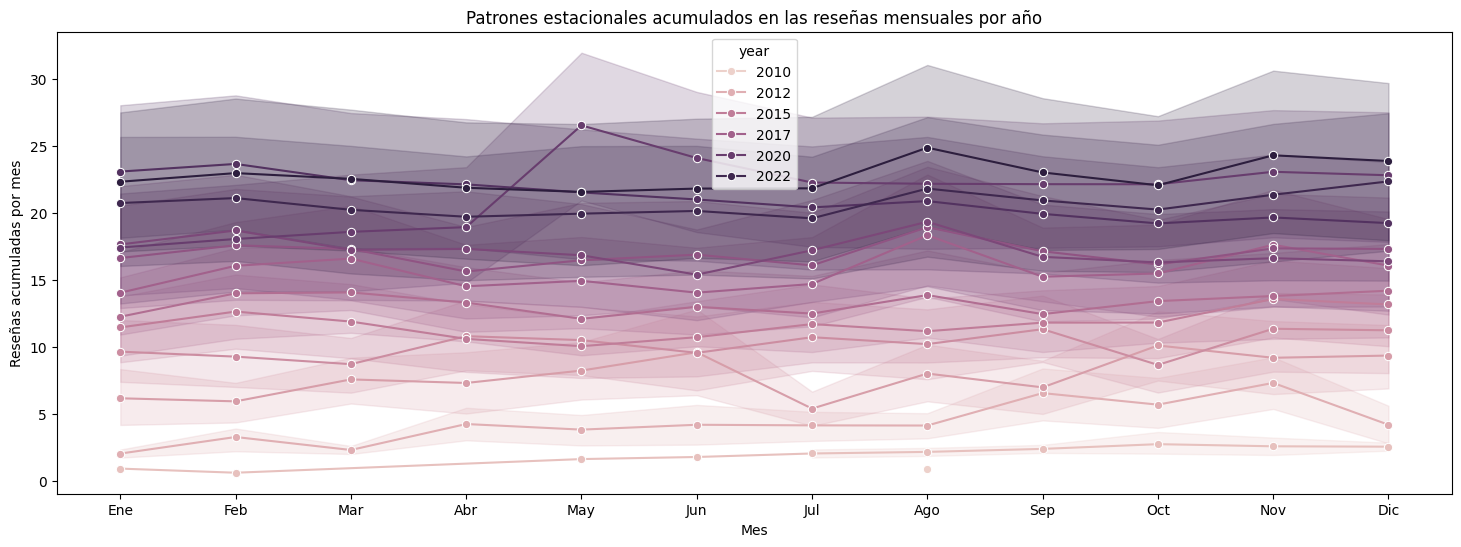

In [64]:
# Creamos el gráfico de líneas
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x="month", y="cumulative_reviews", hue="year", marker="o")

plt.title("Patrones estacionales acumulados en las reseñas mensuales por año")
plt.xlabel("Mes")
plt.ylabel("Reseñas acumuladas por mes")
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

Esta gráfica es muy útil para analizar tendencias estacionales y anuales de las reviews. A nivel anual, se ve cómo cada año la cantidad de reviews ha aumentado en general, de acuerdo con el auge de Airbnbs y otros alquileres vacacionales que se han normalizado en la Comunidad. A nivel mensual, y sobre todo en los años más recientes, se podría argumentar que hay ligeros picos en meses festivos en torno a verano (may/ago) y Navidad (nov/dic).

#### 2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio (2 puntos)

In [70]:
# Extraemos el año y el mes de la columna 'date' (como antes)
df_reg = df
df_reg['year'] = df_reg['date'].dt.year
df_reg['month'] = df_reg['date'].dt.month

# Agregamos los datos, ya que se pide. Vamos a elegir, según la variable, qué la representa mejor:
df_agg = df_reg.groupby(['year', 'month']).agg({
    'listings_count': 'sum',        # Total de propiedades
    'nigth_price': 'mean',          # Precio promedio por noche
    'availability_365': 'mean',     # Promedio de disponibilidad anual
    'hosts_count': 'sum',           # Total de anfitriones activos
    'number_of_reviews': 'sum',     # Total de reseñas
    'm2_price': 'mean'              # Precio por m2 (variable objetivo)
}).reset_index()

# Variables dependientes y la dependiente
X = df_agg[["listings_count", "nigth_price", "availability_365", "hosts_count", "number_of_reviews"]]
y = df_agg["m2_price"]

# Escalamos las características (¡importante!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314)

# Modelo ElasticNet
reg = ElasticNet(max_iter=10000)
reg.fit(X_train, y_train)

# Predicciones
predictions = reg.predict(X_test)
predictions_train = reg.predict(X_train)

# Métricas de evaluación
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
mae_train = mean_absolute_error(y_train, predictions_train)
mape_train = mean_absolute_percentage_error(y_train, predictions_train)

rmse_test = np.sqrt(mean_squared_error(y_test, predictions))
mae_test = mean_absolute_error(y_test, predictions)
mape_test = mean_absolute_percentage_error(y_test, predictions)

# Resultados
print(f"El RMSE de train del modelo es: {rmse_train:.2f}")
print(f"El MAE de train del modelo es: {mae_train:.2f}")
print(f"El MAPE de train del modelo es: {100 * mape_train:.2f}%")

print(f"\nEl RMSE de test del modelo es: {rmse_test:.2f}")
print(f"El MAE de test del modelo es: {mae_test:.2f}")
print(f"El MAPE de test del modelo es: {100 * mape_test:.2f}%")

# Coeficientes del modelo
print("\nCoeficientes del modelo:")
print(f"Intercept: {reg.intercept_}")
for i, feature in enumerate(X.columns):
    print(f"Coeficiente de {feature}: {reg.coef_[i]}")

El RMSE de train del modelo es: 0.84
El MAE de train del modelo es: 0.65
El MAPE de train del modelo es: 5.15%

El RMSE de test del modelo es: 0.89
El MAE de test del modelo es: 0.67
El MAPE de test del modelo es: 5.38%

Coeficientes del modelo:
Intercept: 10.08196669374735
Coeficiente de listings_count: -0.0008443359133562909
Coeficiente de nigth_price: 0.014666523030978462
Coeficiente de availability_365: 0.009001429242998444
Coeficiente de hosts_count: 0.002291679893699196
Coeficiente de number_of_reviews: -0.0005151432485770428


Hemos conseguido crear un modelo de regresión lineal bastante bueno. Ninguno de los coeficientes es un e0.000000, todos presentan un peso relativamente significativo. De entre todos, el que mejor podría explicar el precio del suelo de Madrid es el precio por noche de los alquileres turísticos, una conclusión a la que habíamos llegado nosotros en el apartado anterior, que se verifica. De nuevo, tiene sentido, ya que el "valor" del suelo aplica a visitantes y a residentes por igual. Otros explicadores, como la disponibilidad de los alquileres temporales y la cantidad de anfitriones, reflejan que en una ciudad cada vez más gentrificada, se expulsa a los residentes para reformar los barrios y ocupar viviendas con fines turísticos, lo que reduce la oferta de viviendas y provoca que aumenten los precios de la forma tan pronunciada que hemos visto en las gráficas, y que el modelo confirma.

El RMSE del modelo en entrenamiento es de 0.84, con un 5.15% de MAPE, valores muy buenos - el modelo es eficaz.
El RMSE del modelo en test es de 0.89, con un 5.38% de MAPE, valores muy similares a los de entrenamiento - el modelo es robusto y no sufre de overfitting.

#### 3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo (2 puntos)

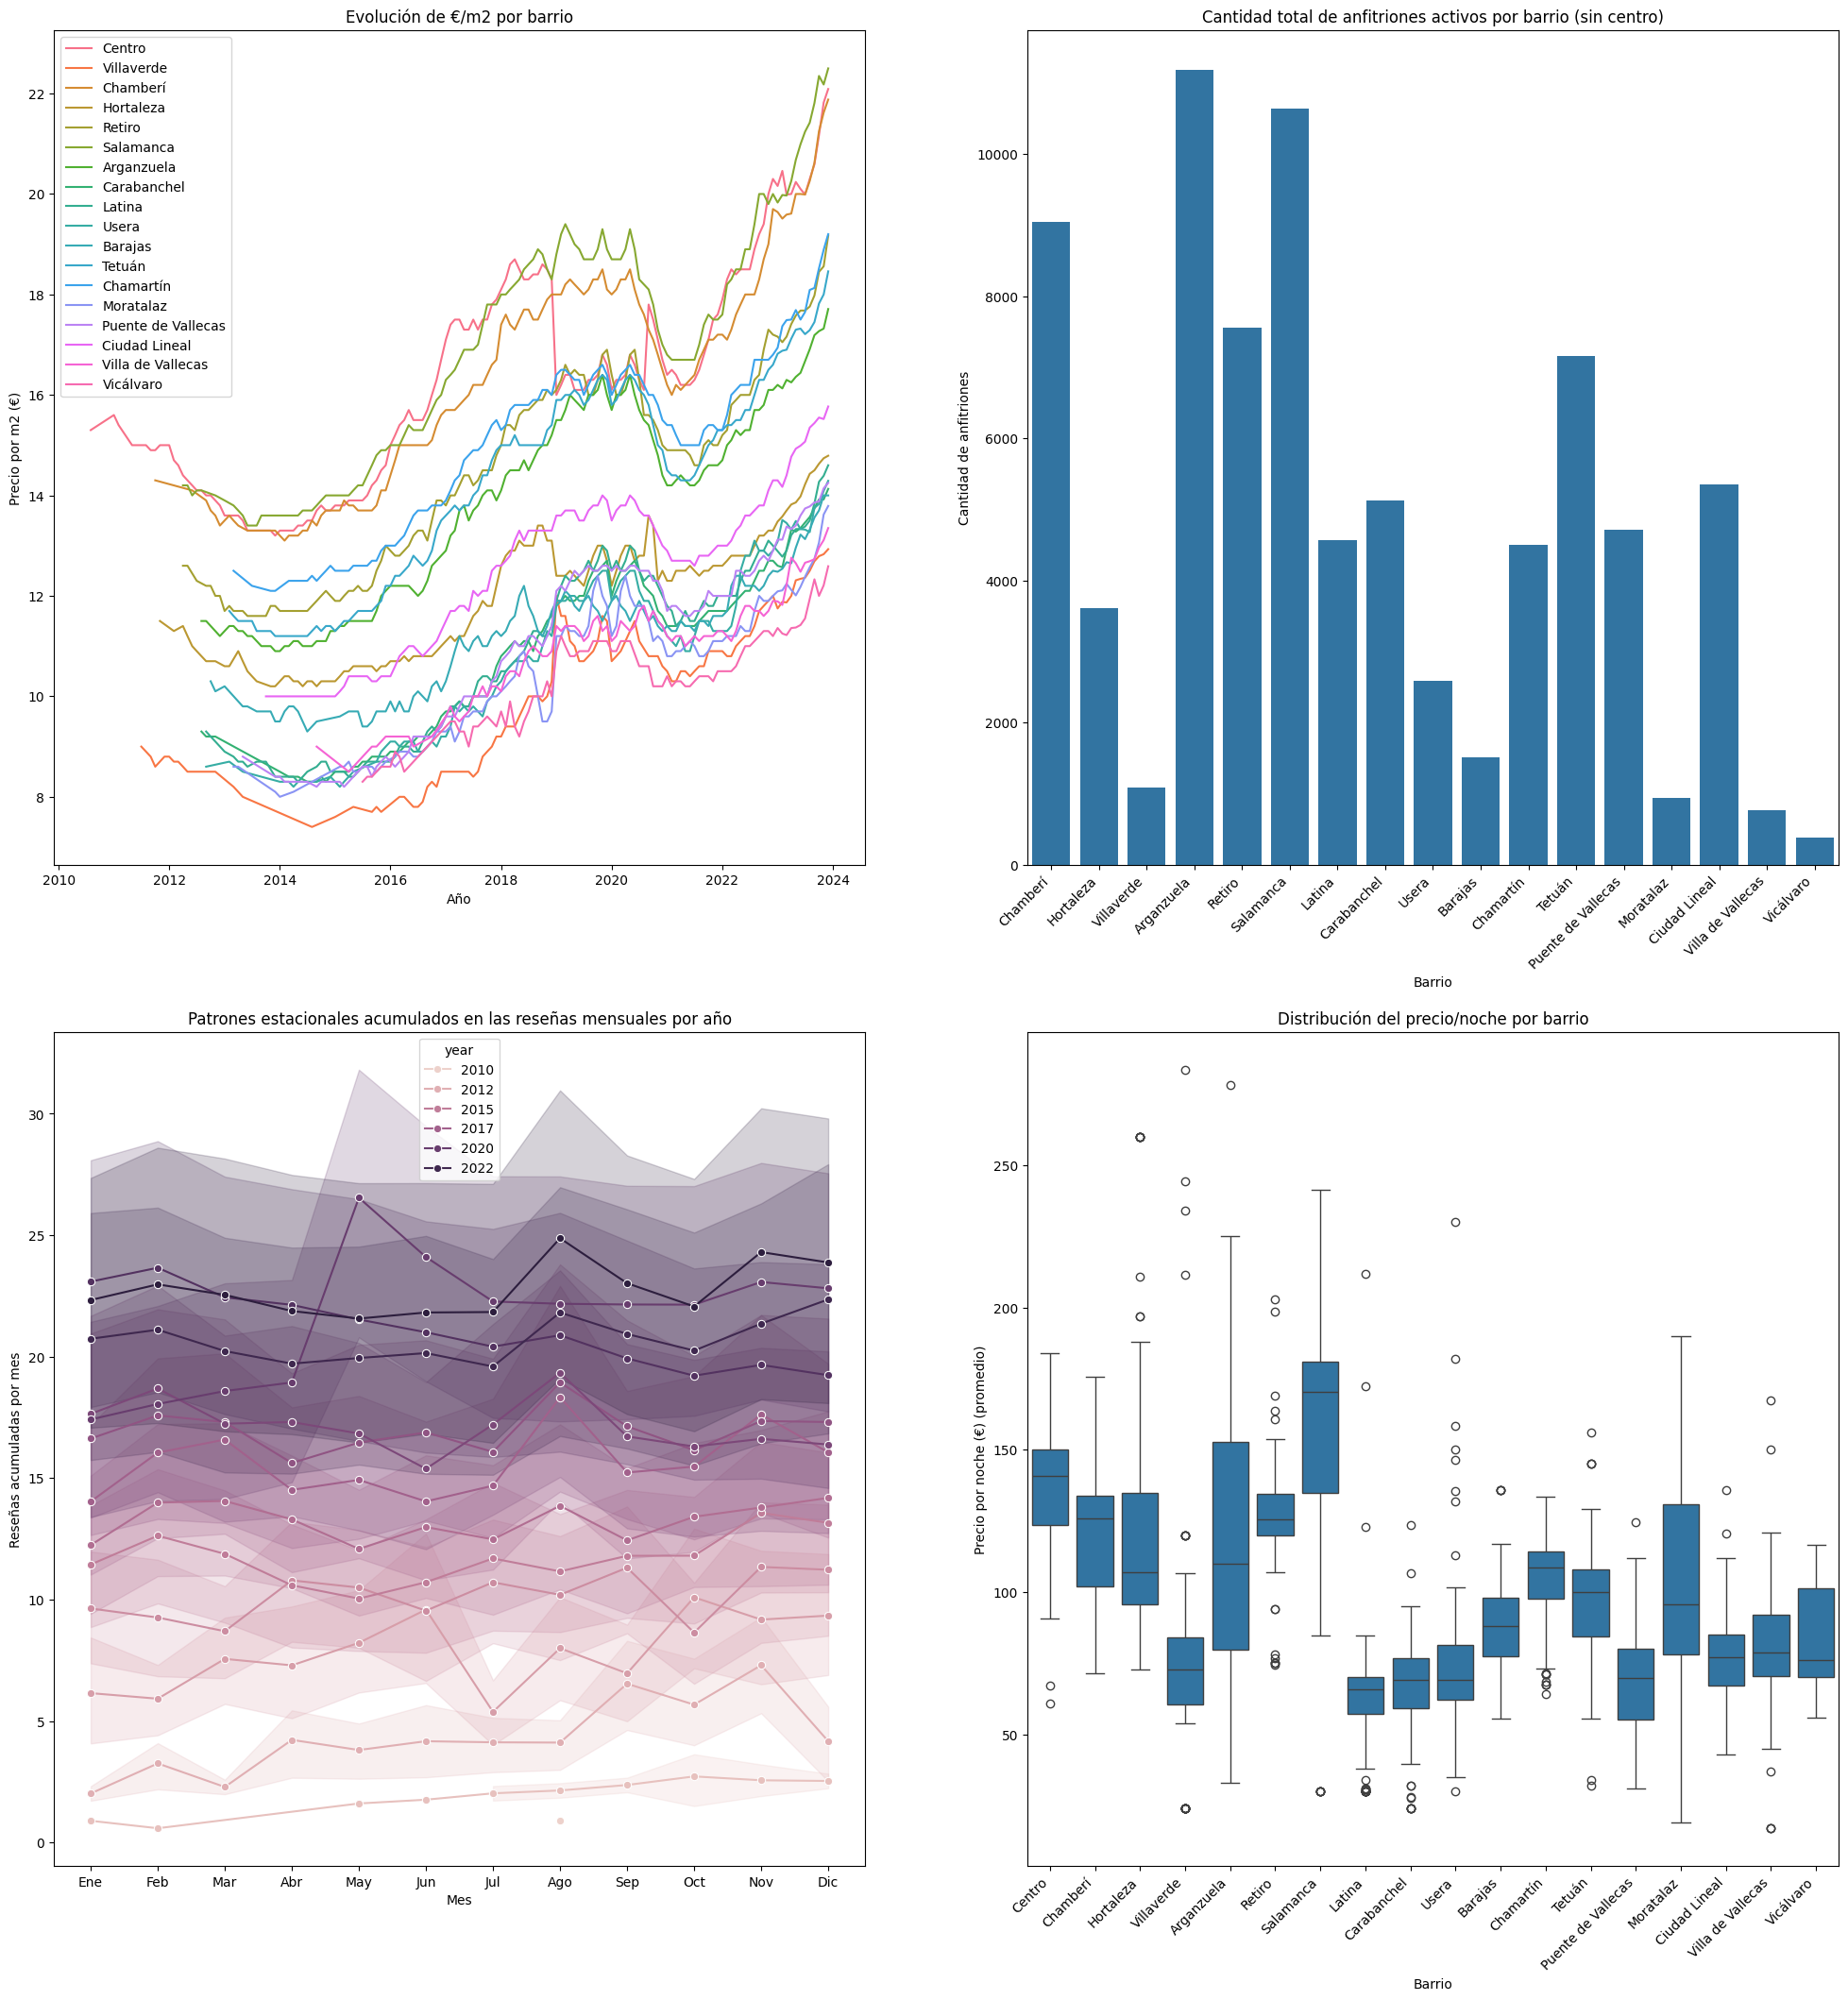

In [94]:
plt.figure(figsize = (28, 18))

# Primera figura (top-left)
plt.subplot(2, 2, 1) # Número de filas, número de columnas, número de figura

sns.lineplot(data=df_grouped_barrio, x="date", y="m2_price", hue="neighbourhood_group")
plt.title("Evolución de €/m2 por barrio")
plt.xlabel("Año")
plt.ylabel("Precio por m2 (€)")
plt.legend()

# Segunda figura (top-right)
plt.subplot(2, 2, 2)

sns.barplot(data=df_sin_centro, x="neighbourhood_group", y="hosts_count", estimator="sum", errorbar=None) # Usamos el TOTAL
plt.title("Cantidad total de anfitriones activos por barrio (sin centro)")
plt.xlabel("Barrio")
plt.ylabel("Cantidad de anfitriones")
plt.xticks(rotation=45, ha="right")

# Tercera figura (bottom-left)
plt.subplot(2, 2, 3)

sns.lineplot(data=df, x="month", y="cumulative_reviews", hue="year", marker="o")
plt.title("Patrones estacionales acumulados en las reseñas mensuales por año")
plt.xlabel("Mes")
plt.ylabel("Reseñas acumuladas por mes")
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Cuarta figura (bottom-right)
plt.subplot(2, 2, 4)

sns.boxplot(data=df_sin_outliers, x="neighbourhood_group", y="nigth_price")
plt.title("Distribución del precio/noche por barrio")
plt.xlabel("Barrio")
plt.ylabel("Precio por noche (€) (promedio)")
plt.xticks(rotation=45, ha="right")

plt.subplots_adjust(bottom=-0.2, right=0.8)
plt.show()